## Chapter3 神经网络
* 最左层 **输入层** 中间 **隐层** 最右层 **输出层**
* 从左到右，编号0，1，2...
* 虽然3层神经元，但只有两层有权重，称为**“双层网络“**，也有的称为3层

### 复习感知机

$$ y =\left\{
\begin{aligned}
0 & & （b + \omega_1x_1 + \omega_2x_2 \leq 0) \\
1 & & （b + \omega_1x_1 + \omega_2x_2 > 0) \\
\end{aligned}   ~~~~~~  (3.1)
\right.
$$

(3.1）可以简化为：
$$y = h(b+\omega_1 x_1+\omega_2x_2)$$

### 激活函数登场
* 感知机和神经网络的主要区别就在于激活函数。感知机为阶跃函数

### 阶跃函数的实现
* 输入大于0，输出1；否则输出0.

In [ ]:
# 参数只接收浮点数
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
# 参数为Numpy数组的实现
import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
# 解释以上阶跃函数的实现
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

In [6]:
# 把bool数组转化成int型数组
y = y.astype(np.int)
y

array([0, 1, 1])

### 阶跃函数的图形

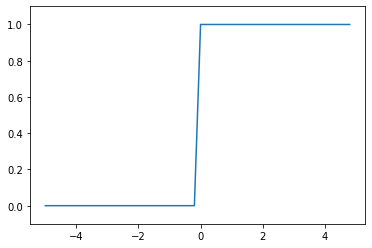

In [17]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.2)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 注意上图在0处并不是垂直的阶跃，因为x=0，y=0； x=0.1 y=1;  所以有一定斜率。

## sigmoid函数

In [54]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))  # np.exp可以接收数组

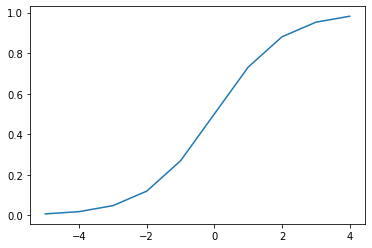

In [20]:
x = np.arange(-5.0, 5.0, 1.0)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

### sigmoid和阶跃函数的比较
* 平滑性
* 返回值 阶跃函数为”竹筒敲石“  sigmoid为”水车“
* 两者均为非线性函数
* **线性函数**的问题在于，不管如何加深层数，总存在与之等效的‘无隐藏层的神经网络’ 。因此激活函数必须非线性

### ReLU函数
* Rectified Linear Unit

$$ h(x) =\left\{
\begin{aligned}
x & & （x > 0) \\
0 & & （x \leq 0) \\
\end{aligned}   
\right.
$$

* 实现

In [21]:
def relu(x):
    return np.maximum(0, x)

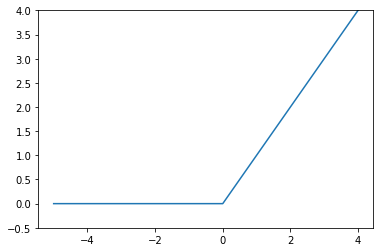

In [23]:
x = np.arange(-5.0, 5.0, 1.0)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.5, 4)
plt.show()

## 多维数组的运算

* np.ndim(A)
* A.shape()
* A.shape[0]

In [2]:
import numpy as np
A = np.array([1, 2, 3, 4])
print('数组A的维度：%d',np.ndim(A))
print(A.shape)
print(A.shape[0])

数组A的维度：%d 1
(4,)
4


In [4]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 矩阵乘法 dot

### 神经网络的内积
#### 例子
    * 输入x1，x2 np.array([x1, x2]) 2*1     输出y1, y2, y3  3*1
    * 系数矩阵 2*3
    
## Notice: 
* np.array([[1], [2]])  为2*1
* np.array([1, 2])  为（2，）
* np.array([[1, 2]])
* x[1,2]的shape值(2,)，意思是一维数组，数组中有2个元素
* y[[1],[2]]的shape值是(2,1)，意思是一个二维数组，每行有1个元素
* z [[1,2]]的shape值是（1，2），意思是一个二维数组，每行有2个元素

In [36]:
X = np.array([[1, 2]])
test = np.array([1,2])

print('X的维数为：',np.ndim(X),' 规格为：',X.shape)
print('test的维数为：',np.ndim(test),' 规格为：',test.shape)

X的维数为： 2  规格为： (1, 2)
test的维数为： 1  规格为： (2,)


In [37]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(np.ndim(W))
print(W.shape)

[[1 3 5]
 [2 4 6]]
2
(2, 3)


In [26]:
## 注意报错
Y = np.dot(W, X)
print(Y)

ValueError: shapes (2,3) and (1,2) not aligned: 3 (dim 1) != 1 (dim 0)

In [47]:
## 
Y = np.dot(X, W)
print(Y)
print(Y.shape)

[[ 5 11 17]]
(1, 3)


## 一个三层神经网络的代码实现

In [48]:
# identity_function
def identity_function(x):
    return x

In [55]:
# network为字典Dic类型
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])  
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
print(network)
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

{'W1': array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]]), 'b1': array([0.1, 0.2, 0.3]), 'W2': array([[0.1, 0.4],
       [0.2, 0.5],
       [0.3, 0.6]]), 'b2': array([0.1, 0.2]), 'W3': array([[0.1, 0.3],
       [0.2, 0.4]]), 'b3': array([0.1, 0.2])}
[0.31682708 0.69627909]


## 输出层的设计

* 一般而言，回归问题用**恒等函数**，分类问题用**softmax**函数

### 恒等函数和softmax函数
##### markdown
    a）强制行内公式$\sum\limits_{k=1}^n{x_k}$的上下限标注在上下：
    b）强制行间公式$$\sum\nolimits_{k=1}^n{x_k}$$上下限标注在右侧：
    c) 这里没有用over而是用的\frac

 $$y_k = \frac {exp(a_k)}{\sum\limits_{i=1}^n {exp(a_i)}} $$

### 代码实现softmax函数

In [ ]:
# 未经激活的输出a
def softmax(a):
    exp_a = np.exp(a)
    exp_sum = np.sum(exp_a)
    return exp_a/exp_sum

### 实现softmax函数时的注意事项
* 指数很容易返回一个无穷大的inf。在这些超大值之前进行除法运算，结果会出现nan(not a number)
* softmax激活函数上下同乘常数C，进入e的指数，输出不变。所以这里对每个a减去max(a)

### 优化后的代码：

In [ ]:
# 未经激活的输出a
def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a-C)
    exp_sum = np.sum(exp_a)
    return exp_a/exp_sum

### softmax函数特征
* 输出值总和为1，从而可以把输出结束为”概率“。概率最大的可以作为输出的”类别“
* 因为softmax不改变各元素的大小关系
* 向前传播可以省略softmax函数的处理
**softmax函数在training阶段要进行，不能省略